In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gridworld_mdp as gw
import numpy as np
from td_utils import policy_eval_MC, policy_evel_TD0, policy_eval_two_arrays, get_equal_policy

In [3]:
np.random.seed(33)
policy = [0.25, 0.25, 0.25, 0.25]
gamma = 0.9
policy_eval_MC(gw, policy, gamma, episodes = 1000, rseed = 33)

array([ 0.        , -5.32854698, -7.24326783, -7.7642399 , -5.26226435,
       -6.62526556, -7.24554479, -7.27415841, -7.07475404, -7.20894566,
       -6.66951359, -5.50531425, -7.64831142, -7.10461349, -5.42679628])

In [4]:
np.random.seed(33)
policy = [0.25, 0.25, 0.25, 0.25]
gamma = 0.9
policy_evel_TD0(gw, policy, gamma, alpha = 0.05, episodes=1000)

array([ 0.        , -4.92243601, -6.95178294, -7.5024948 , -4.86394244,
       -6.84815341, -7.12583339, -7.0586211 , -7.20563338, -7.16308932,
       -6.49094847, -4.98285754, -7.62230476, -7.07967497, -5.20195874])

In [5]:
V = policy_eval_two_arrays(state_count=gw.get_state_count(), 
                           gamma=.9, theta=.001, 
                           get_policy=get_equal_policy,
                           get_transitions=gw.get_transitions)
print(V)

numero de iteraciones: 46
[0.0, -5.274709263277986, -7.123800104889248, -7.64536148969558, -5.274709263277987, -6.602238720082915, -7.17604178238719, -7.1238001048892485, -7.1238001048892485, -7.176041782387191, -6.602238720082915, -5.274709263277986, -7.645361489695581, -7.1238001048892485, -5.274709263277986]


In [6]:
import random_walk as rw

In [7]:
rw.set_states(7)

In [8]:
def get_equal_policy_rw(state):
    # build a simple policy where all 4 actions have the same probability, ignoring the specified state
    policy = (("right", .5), ("left", .5))
    return policy


V_DP = policy_eval_two_arrays(state_count=rw.get_state_count(), 
                           gamma=1, theta=.00001, 
                           get_policy=get_equal_policy_rw,
                           get_transitions=rw.get_transitions)
print(V_DP)

numero de iteraciones: 68
[0.0, 0.16664783183684406, 0.33330508108859946, 0.4999623303403548, 0.6666384144219328, 0.8333144985035108, 0.0]


# Montecarlo

In [9]:
policy = [0.5, 0.5]
gamma = 1
initial_V = np.zeros(rw.get_state_count())
np.random.seed(12)
V_MC_zeros = policy_eval_MC(rw, policy, gamma, episodes = 1000, rseed = 33, ending_states=[0, rw.get_state_count()-1], V = initial_V)
print(V_MC_zeros)
np.random.seed(12)
initial_V = np.random.random(rw.get_state_count())
V_MC_random = policy_eval_MC(rw, policy, gamma, episodes = 1000, rseed = 33, ending_states=[0, rw.get_state_count()-1], V = initial_V)
print(V_MC_random)

[0.         0.15165877 0.30750605 0.47058824 0.64       0.82142857
 0.        ]
[0.         0.15165877 0.30750605 0.47058824 0.64       0.82142857
 0.        ]


# TD0
Ver como es muy dependiente de los valores iniciales

In [27]:
np.random.seed(12)
initial_V = np.zeros(rw.get_state_count())
alpha = 0.01
episodes = 10000
V_TD0_zeros = policy_evel_TD0(rw, policy, gamma, alpha = alpha, episodes=episodes, ending_states=[0, rw.get_state_count()-1], V = initial_V)
print(V_TD0_zeros)
np.random.seed(12)
initial_V = np.random.random(rw.get_state_count())
V_TD0_random = policy_evel_TD0(rw, policy, gamma, alpha = alpha, episodes=episodes, ending_states=[0, rw.get_state_count()-1], V = initial_V)
print(V_TD0_random)

[0.         0.16835042 0.33795448 0.49992487 0.67080656 0.83874119
 0.        ]
[0.15416284 0.4511658  0.74738031 1.02404163 1.33179449 1.6190681
 0.90071485]


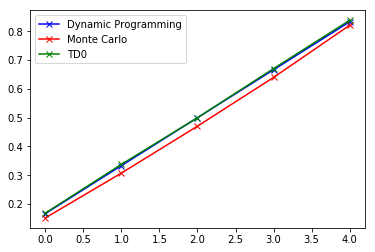

In [33]:
from matplotlib import pyplot as plt

plt.plot(V_DP[1:-1], c = 'b', marker='x', label = 'Dynamic Programming')
plt.plot(V_MC_random[1:-1], c='r', marker='x', label = 'Monte Carlo')
plt.plot(V_TD0_zeros[1:-1], c='g', marker='x', label = 'TD0')
# plt.plot(V_TD0_random[1:-1], c='g', marker='x', label = 'TD0 random')
plt.legend()
plt.show()

# TD0 diferente cantidad de iteraciones

In [37]:
initial_V = 0.5*np.ones(rw.get_state_count())
alpha = 0.1
iterations = [0, 1, 10, 100]
results = []
for episodes in iterations:
    np.random.seed(20)
    V = policy_evel_TD0(rw, policy, gamma, alpha = alpha, episodes=episodes, ending_states=[0, rw.get_state_count()-1], V = initial_V)
    results.append(V)

In [38]:
results

[array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5]),
 array([0.5       , 0.5000059 , 0.50013414, 0.50475307, 0.5542346 ,
        0.81301196, 0.5       ]),
 array([0.5       , 0.57282365, 0.72760457, 0.93858147, 1.11993202,
        1.33861219, 0.5       ])]

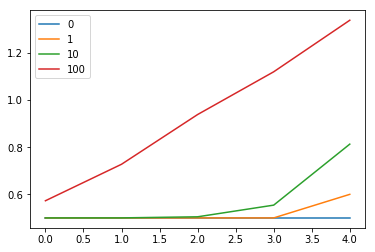

In [39]:
for i, r in enumerate(results):
    plt.plot(r[1:-1], label = iterations[i])
plt.legend()